Index(['book_id', 'goodreads_book_id', 'best_book_id', 'work_id',
       'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year',
       'original_title', 'title', 'language_code', 'average_rating',
       'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'image_url', 'small_image_url'],
      dtype='object')


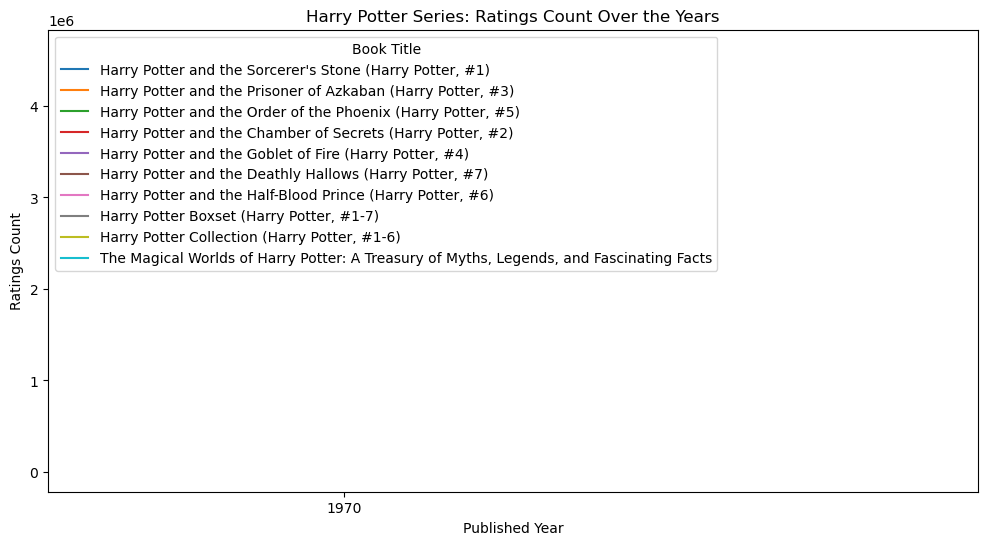

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('books.csv')

print(df.columns)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df['original_publication_year'] = pd.to_datetime(df['original_publication_year'], errors='coerce')

# Filter books containing 'Harry Potter' in the book title
harry_potter_books = df[df['title'].str.contains('Harry Potter', case=False)]

# Group by book title and sum the ratings count to get the total ratings count for each book
top_selling_books = harry_potter_books.groupby('title')['ratings_count'].sum().sort_values(ascending=False)

# Calculate the average rating of Harry Potter books
average_rating = harry_potter_books['average_rating'].mean()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=harry_potter_books, x='original_publication_year', y='ratings_count', hue='title')
plt.title('Harry Potter Series: Ratings Count Over the Years')
plt.xlabel('Published Year')
plt.ylabel('Ratings Count')
plt.legend(title='Book Title', loc='upper left')
plt.show()

with open('analysis_results.txt', 'w') as f:
    f.write(f'Top Selling Books:\n{top_selling_books}\n\n')
    f.write(f'Average Rating of Harry Potter Books: {average_rating}\n')
